In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

DATA_PATH = 'Generated_Foraminifera/species_1/specimen_08/Views/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
pip install OpenEXR


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


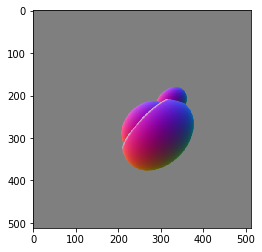

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(512, 512, 3)


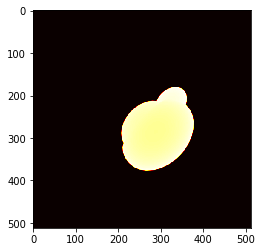

109415
0
(512, 512)


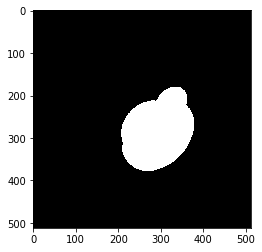

In [0]:
#references:
#https://excamera.com/articles/26/doc/intro.html
#https://excamera.com/articles/26/doc/openexr.html

import pandas as pd
import matplotlib
import numpy as np
import OpenEXR
import Imath
import matplotlib.pyplot as plt

pt = Imath.PixelType(Imath.PixelType.FLOAT)
cube = OpenEXR.InputFile(DATA_PATH + "View_08.exr")
#cube.header() shows the header of the exr file. It will show all channel names and data type.
dw = cube.header()['dataWindow']
size = (dw.max.x - dw.min.x +1, dw.max.y - dw.min.y +1)
cube.header()
#show normal vectors
redstr= cube.channel('normal.R',pt)
greenstr= cube.channel('normal.G',pt)
bluestr= cube.channel('normal.B',pt)
red = numpy.fromstring(redstr, dtype=numpy.float32)
blue = numpy.fromstring(bluestr, dtype=numpy.float32)
green = numpy.fromstring(greenstr, dtype=numpy.float32)
red.shape = (size[1],size[0])
blue.shape = (size[1],size[0])
green.shape = (size[1],size[0])
img = numpy.stack((red,blue,green),axis=2)
img += 1
img /= 2
img *= 255
img = img.astype(numpy.uint8)
plt.imshow(img,cmap='jet',interpolation='nearest')
plt.show()
print(img.shape)

# #show color img
# redstr= cube.channel('color.R',pt)
# greenstr= cube.channel('color.G',pt)
# bluestr= cube.channel('color.B',pt)
# red = numpy.fromstring(redstr, dtype=numpy.float32)
# blue = numpy.fromstring(bluestr, dtype=numpy.float32)
# green = numpy.fromstring(greenstr, dtype=numpy.float32)
# red.shape = (size[1],size[0])
# blue.shape = (size[1],size[0])
# green.shape = (size[1],size[0])
# img = numpy.stack((red,blue,green),axis=2)
# plt.imshow(img,cmap='hot',interpolation='nearest')
# plt.show()
# print(img.shape)

greystr= cube.channel('distance.Y',pt)
grey = numpy.fromstring(greystr, dtype=numpy.float32)
grey.shape = (size[1],size[0])
plt.imshow(grey,cmap='hot',interpolation='nearest')
plt.show()

#print(img.shape)



# #note values in the image are scaled 0 to 255. The matrix values cannot be directly viewed due to distances being >255
print(numpy.argmax(grey))
print(numpy.argmin(grey))


#if you want the silhouette, just get the indices from the distance matrix
print(grey.shape)
#grey.shape

#sil = numpy.array([x >= 1 for x,y in numpy.ndindex(grey.shape)])
grey = grey.astype(int)
#sil.shape
sil = numpy.array([128 if i > 0 else 0 for i in np.nditer(grey)])
sil = sil.reshape(512,512)
#print(sil)
#for i in numpy.nditer(grey):
#  if grey[i] > 0

# images_g = numpy.array([to_grayscale(sil[i]) for i in range(sil.shape[0])])
plt.imshow(sil, cmap='gray')
#plt.gca().set_facecolor('white')
plt.show()

# plt.imshow(images_g,cmap='Greys',  interpolation='nearest')
# plt.show()



In [0]:
!ls Generated_Foraminifera/species_1/specimen_08/Views/

View_00.exr  View_08.xml  View_17.exr  View_25.xml  View_34.exr  View_42.xml
View_00.xml  View_09.exr  View_17.xml  View_26.exr  View_34.xml  View_43.exr
View_01.exr  View_09.xml  View_18.exr  View_26.xml  View_35.exr  View_43.xml
View_01.xml  View_10.exr  View_18.xml  View_27.exr  View_35.xml  View_44.exr
View_02.exr  View_10.xml  View_19.exr  View_27.xml  View_36.exr  View_44.xml
View_02.xml  View_11.exr  View_19.xml  View_28.exr  View_36.xml  View_45.exr
View_03.exr  View_11.xml  View_20.exr  View_28.xml  View_37.exr  View_45.xml
View_03.xml  View_12.exr  View_20.xml  View_29.exr  View_37.xml  View_46.exr
View_04.exr  View_12.xml  View_21.exr  View_29.xml  View_38.exr  View_46.xml
View_04.xml  View_13.exr  View_21.xml  View_30.exr  View_38.xml  View_47.exr
View_05.exr  View_13.xml  View_22.exr  View_30.xml  View_39.exr  View_47.xml
View_05.xml  View_14.exr  View_22.xml  View_31.exr  View_39.xml  View_48.exr
View_06.exr  View_14.xml  View_23.exr  View_31.xml  View_40.exr  View_48.xml

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


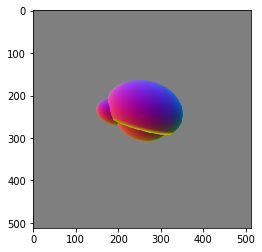

(512, 512, 3)


In [0]:

import pandas as pd
import matplotlib
import numpy 
import OpenEXR
import Imath
import matplotlib.pyplot as pltimport
import glob

for filepath in glob.iglob('my_dir/*.asm'):
  pt = Imath.PixelType(Imath.PixelType.FLOAT)

cube = OpenEXR.InputFile(DATA_PATH + "View_02.exr")
#cube.header() shows the header of the exr file. It will show all channel names and data type.
dw = cube.header()['dataWindow']
size = (dw.max.x - dw.min.x +1, dw.max.y - dw.min.y +1)
cube.header()
#show normal vectors
redstr= cube.channel('normal.R',pt)
greenstr= cube.channel('normal.G',pt)
bluestr= cube.channel('normal.B',pt)
red = numpy.fromstring(redstr, dtype=numpy.float32)
blue = numpy.fromstring(bluestr, dtype=numpy.float32)
green = numpy.fromstring(greenstr, dtype=numpy.float32)
red.shape = (size[1],size[0])
blue.shape = (size[1],size[0])
green.shape = (size[1],size[0])
img = numpy.stack((red,blue,green),axis=2)
img += 1
img /= 2
img *= 255
img = img.astype(numpy.uint8)
plt.imshow(img,cmap='jet',interpolation='nearest')
plt.show()
print(img.shape)


In [0]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

53 174


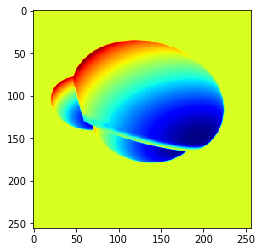

In [0]:
image_crop = np.sum(img,axis=2)
image_crop = np.rint(np.divide(image_crop,3))
image_crop = image_crop.astype(numpy.uint8)

image1 = crop_center(image_crop,256,256)
plt.imshow(image1,cmap='jet',interpolation='nearest')
print(image1.min(),image1.max())


In [0]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [0]:
!cd 'gdrive/My\ Drive/NN\ Capstone'
!chmod +x binvox

In [0]:
!./binvox 


--- [binvox] mesh voxelizer, version 1.26, build #644 on 2017/10/22 15:19:22
--- written by Patrick Min, 2004-2017

Error: missing model filename

Usage: binvox [-d <voxel dimension>] [-t <voxel file type>] [-c] [-v] <model filespec>
  -license: show software license
  -d: specify voxel grid size (default 256, max 1024)(no max when using -e)
  -t: specify voxel file type (default binvox, also supported: hips, mira, vtk, raw, schematic, msh)
  -c: z-buffer based carving method only
  -dc: dilated carving, stop carving 1 voxel before intersection
  -v: z-buffer based parity voting method only (default is both -c and -v)
  -e: exact voxelization (any voxel with part of a triangle gets set)(does not use graphics card)
Additional parameters:
  -bb <minx> <miny> <minz> <maxx> <maxy> <maxz>: force a different input model bounding box
  -ri: remove internal voxels
  -cb: center model inside unit cube
  -rotx: rotate object 90 degrees ccw around x-axis before voxelizing
  -rotz: rotate object 